### INTRODUCTION

* In this notebook we will explore face detection using Haar Cascades, Which is a key component of a Viola Jones object detection framework.
* Keep in mind that this is a face detection, not face recognition.

### What is Haar Cascade?

 * Is a machine learning object detection algorithm used to identify objects in an image or video and based on the concept of features proposed by Paul Viola and Michael Jones in their paper "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001.

* Haar-like features are digital image features used in object recognition. They owe their name to their intuitive similarity with Haar wavelets and were used in the first real-time face detector.

In [11]:
#import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2

#### GET THE TEST IMAGES

In [12]:
leo = cv2.imread('./input/test-images/leonardo.jpg',1)
teamusa = cv2.imread('./input/test-images/usa.jpg',1)

#### SHOW SAMPLE IMAGE

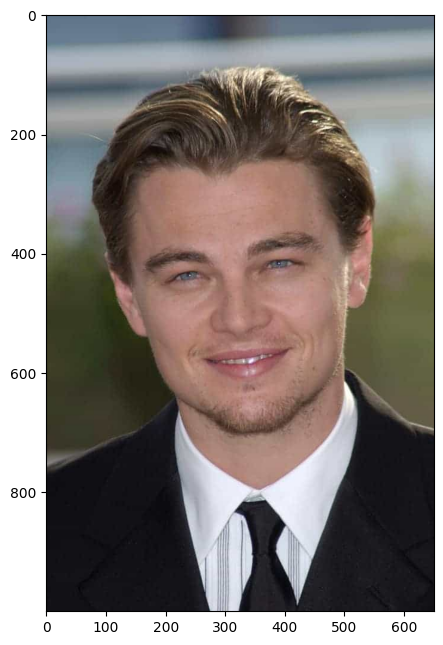

In [13]:
plt.figure(figsize=(5,10))
leo_rgb = cv2.cvtColor(leo, cv2.COLOR_BGR2RGB)
plt.imshow(leo_rgb);

#### GET THE HAAR CASCADE FILE

In [34]:
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_frontalface_default.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_eye.xml')

# face_cascade = cv2.CascadeClassifier('./input/haarcascades/frontalcatface_extended.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_frontalface_alt_tree.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_frontalface_alt.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_frontalface_alt2.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_fullbody.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_lefteye_2splits.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_licence_plate_rus_16stages.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_profileface.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_righteye_2splits.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_russian_plate_number.xml.xml')
# face_cascade = cv2.CascadeClassifier('./input/haarcascades/haarcascade_lefteye_2splits.xml')



#### DETECT THE FACE

In [35]:
def detect_face (img):
    face_img = img.copy()
    detect_img = face_cascade.detectMultiScale(face_img)
    
    #get the coordinates and draw a rectangle
    for (x,y,w,h) in detect_img:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (0,255,0), 3)
    
    return face_img

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


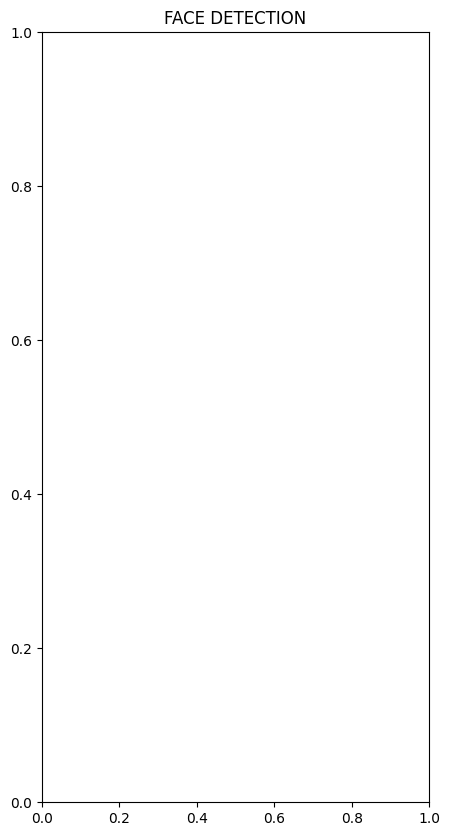

In [36]:
#show results
plt.figure(figsize=(5,10))
plt.title('FACE DETECTION')
result = detect_face(leo_rgb)
plt.imshow(result);

#### LET'S TRY THE TEAM USA PICTURE

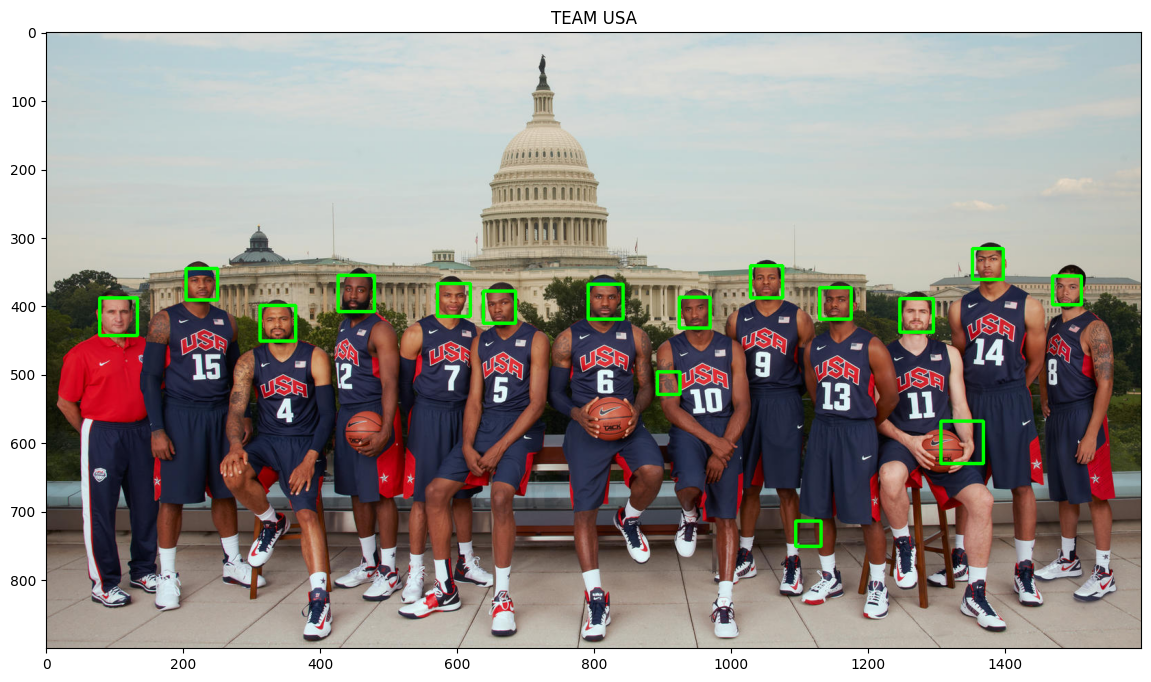

In [17]:
usa_rgb = cv2.cvtColor(teamusa, cv2.COLOR_BGR2RGB)
result = detect_face(usa_rgb)
plt.figure(figsize=(20,8))
plt.title('TEAM USA')
plt.imshow(result);

* Right off the bat you will notice that some of these things that it's detecting are not faces, to fix this we're going to add afew parameters specifically scaleFactor and minimumNeighbors.
* ScaleFactor is a parameter specifying how much the image size is reduced at each image scale
* minNeighbors is a parameter specifying how many neighbors each candidate rectangle should have to retain it. 

In [18]:
#Adjust the detect_face function
def detect_face (img):
    face_img = img.copy()
    detect_img = face_cascade.detectMultiScale(face_img, scaleFactor=1.3, minNeighbors=3)
    
    #get the coordinates and draw a rectangle
    for (x,y,w,h) in detect_img:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (0,255,0), 3)
    
    return face_img

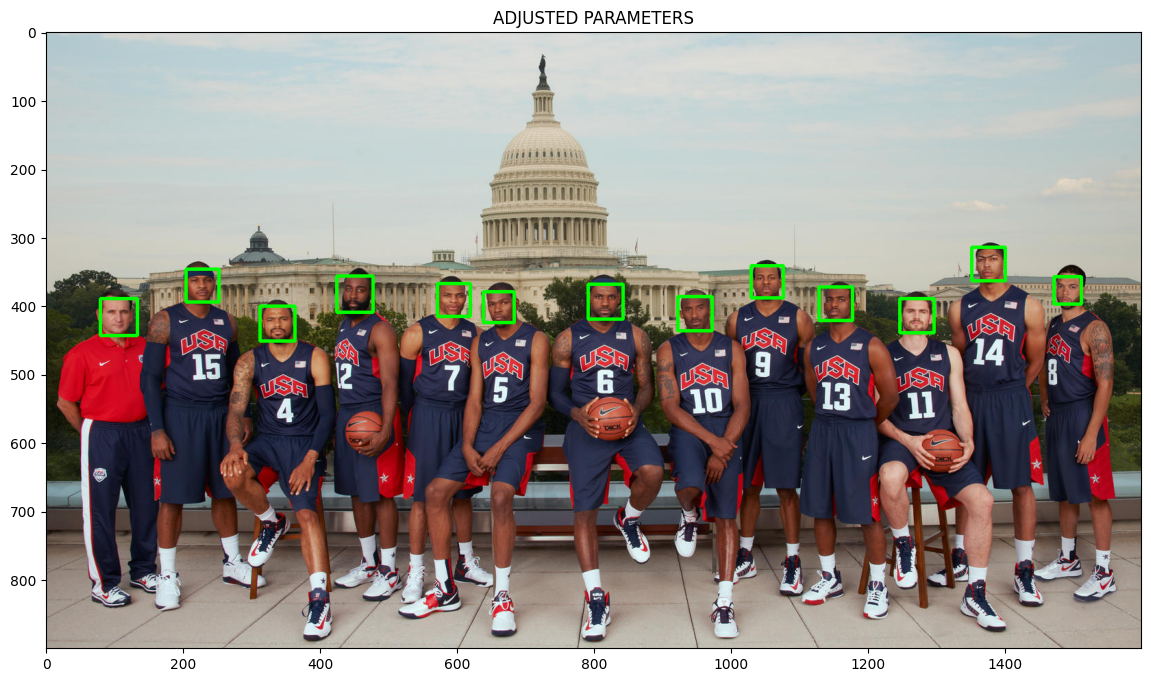

In [19]:
# show result
usa_rgb = cv2.cvtColor(teamusa, cv2.COLOR_BGR2RGB)
result = detect_face(usa_rgb)
plt.figure(figsize=(20,8))
plt.title('ADJUSTED PARAMETERS')
plt.imshow(result);

* You see now you get a much better and clear detection of actual faces.
* Go ahead and play of some of these parameters
* I only use couple of defaults that worked well for me but a lot times is just experimentation.

### FACE DETECTION ON VIDEOS

In [21]:
vid_capture = cv2.VideoCapture(0)

while True:
    #read the frames
    ret, frame = vid_capture.read(0)
    
    #detect faces
    frame = detect_face(frame)
    cv2.imshow('Face Detection', frame);
    
    #press esc key to exit
    k = cv2.waitKey(1)
    if k==27:
        break
        
vid_capture.release()
cv2.destroyAllWindows()

* Currently, Kernels are not able to support cam access. Run the code on your local computer to test it.